In [2]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import *
import scipy

In [8]:
#Defining the system in momentum space

#Some parameters

t = 100
v1 = 0.5
v2 = 1

def v(k):
    return v1 + v2*np.exp(1j*k)
def phi(k):
    return np.angle(v(k))

n_res = 50
n_sites = 51
E_res = np.linspace(0,1/8,n_res)
E = np.insert(E_res,0,0)
BZ = np.linspace(-np.pi/n_sites*(n_sites-1),np.pi/n_sites*(n_sites-1),n_sites)

#The Hamiltonian

def n(k,j,alpha):
    return 1/50*v(k)*E_res[j-1]**(alpha/2)

def H(k,alpha):
    H_0 = np.diag(E)
    H_0 = np.array(H_0, dtype = 'complex')
    for i in range(1,n_res+1):
        H_0[0,i] += n(k,i,alpha)
        H_0[i,0] += np.conjugate(n(k,i,alpha))
    return H_0

#The inital state

psi_0 = np.zeros(n_res+1)
psi_0 = np.array(psi_0, dtype = 'complex')
psi_0[0] = 1

#The relevant observable

def pr(state):
    return 1 - np.conjugate(state[0]) * state[0]
    return np.linalg.norm(state)**2 - state[0]*np.conjugate(state[0])
dphi = np.gradient(phi(BZ), BZ[1] - BZ[0])

def sol(k, alpha):
    H_0 = H(k, alpha)
    U = scipy.linalg.expm(-1j*H_0)
    temp = np.zeros((t,n_res+1), dtype = 'complex')
    temp[0] = psi_0
    for i in range(1,len(temp)):
        temp[i] = U@temp[i-1]/np.linalg.norm(U@temp[i-1])
    return temp

def data(alpha):
    temp = np.zeros((len(BZ),t,n_res+1), dtype = 'complex')
    for i in range(len(BZ)):
        for j in range(t):
            temp[i,j] += sol(BZ[i],alpha)[j]
    return temp

def m(a):
    arr = data(a)
    temp = np.zeros(t, dtype = 'complex')
    for i in range(t):
        for j in range(len(BZ)):
            temp[i] += 1/n_sites*pr(arr[j,i])*dphi[j]
    return np.real(temp)

In [14]:
c

-3.0799927976370522

In [10]:
np.abs(H(0,.5))

array([[0.        , 0.        , 0.00674217, ..., 0.01765323, 0.01774639,
        0.01783811],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00674217, 0.        , 0.00255102, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01765323, 0.        , 0.        , ..., 0.11989796, 0.        ,
        0.        ],
       [0.01774639, 0.        , 0.        , ..., 0.        , 0.12244898,
        0.        ],
       [0.01783811, 0.        , 0.        , ..., 0.        , 0.        ,
        0.125     ]])

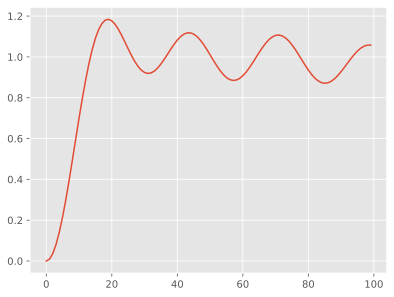

In [11]:
plt.plot(2*m(0.5))

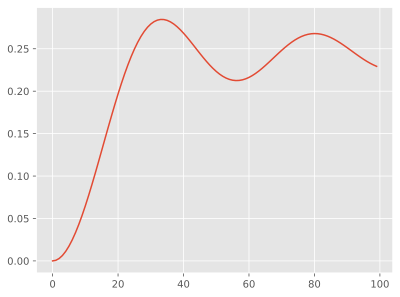

In [12]:
plt.plot(2*m(1.5))